In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from joblib import load, dump

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Shape: ', train.shape)
train.head()

Shape:  (54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
print('Shape: ', test.shape)
test.head()

Shape:  (23490, 13)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


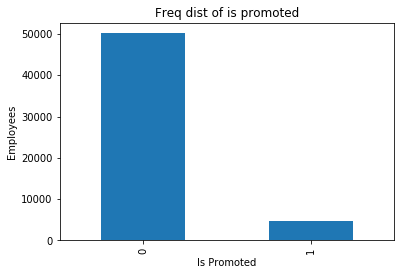

In [7]:
train['is_promoted'].value_counts().plot.bar(title='Freq dist of is promoted')
plt.xlabel('Is Promoted')
plt.ylabel('Employees')
plt.show()

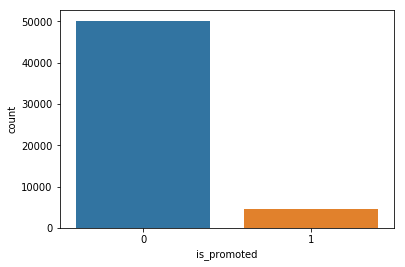

In [8]:
sns.countplot(train['is_promoted'])
plt.show()

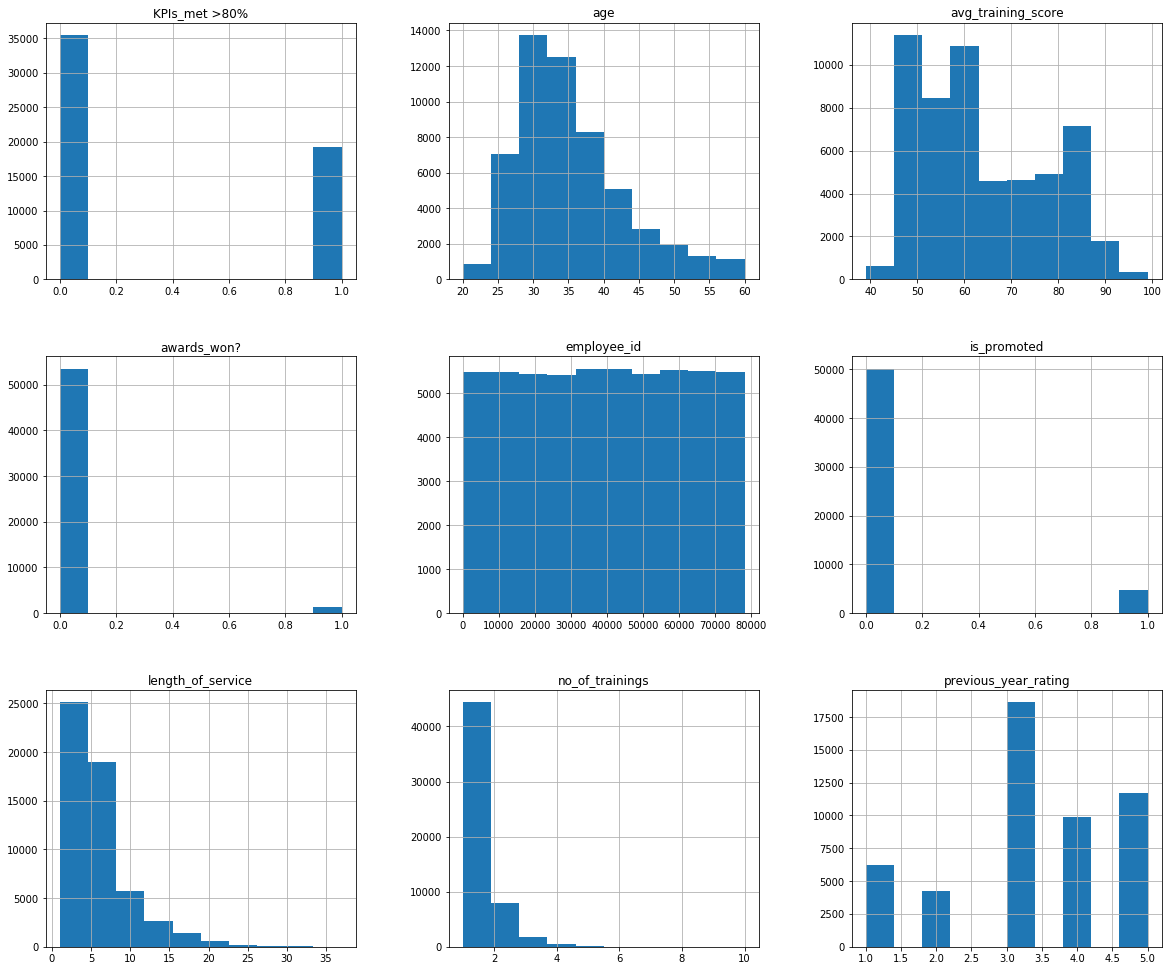

In [9]:
train.hist(figsize=(20,17))
plt.show()

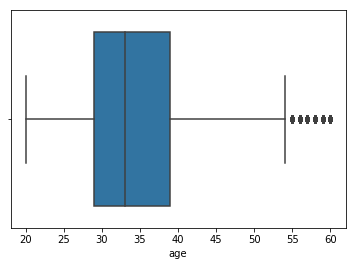

In [10]:
sns.boxplot(train['age'])

In [11]:
train.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

In [12]:
# Q1 = 29
# Q3 = 39
# IQR = Q3 - Q1
# minout = Q1 - 1.5*IQR
# maxout = Q3 + 1.5*IQR
# # Findind the index of outlier
# yindex=np.where(train['age'] > 54)
# yindex2 = np.where(train['age'] < 14)

In [13]:
# # [train.drop(train.index[i], inplace=True) for i in yindex2]
# for i in yindex:
#     train.drop(train.index[i], inplace=True)

In [14]:
train.groupby('department').is_promoted.value_counts()

department         is_promoted
Analytics          0               4840
                   1                512
Finance            0               2330
                   1                206
HR                 0               2282
                   1                136
Legal              0                986
                   1                 53
Operations         0              10325
                   1               1023
Procurement        0               6450
                   1                688
R&D                0                930
                   1                 69
Sales & Marketing  0              15627
                   1               1213
Technology         0               6370
                   1                768
Name: is_promoted, dtype: int64

In [15]:
pd.crosstab(train['department'], train['is_promoted'], margins=True)

is_promoted,0,1,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


In [16]:
pd.crosstab(train['department'], train['is_promoted'], normalize='index')

is_promoted,0,1
department,,
Analytics,0.904335,0.095665
Finance,0.918770,0.081230
HR,0.943755,0.056245
Legal,0.948989,0.051011
Operations,0.909852,0.090148
Procurement,0.903614,0.096386
R&D,0.930931,0.069069
Sales & Marketing,0.927969,0.072031
Technology,0.892407,0.107593


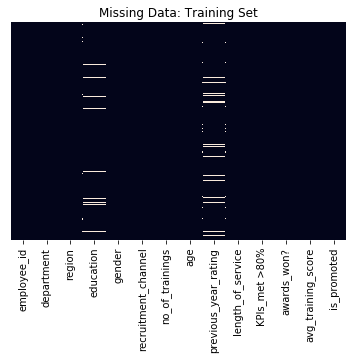

In [17]:
# Heatmap
sns.heatmap(train.isnull(),yticklabels = False, cbar = False)
plt.title('Missing data')
plt.show()

In [19]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

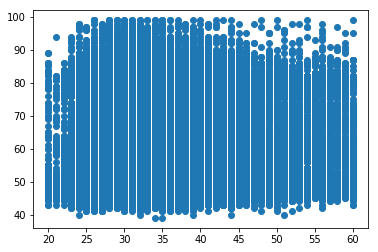

In [20]:
plt.scatter(train['age'], train['avg_training_score'])

In [21]:
train.drop(['employee_id', 'region'], axis=1, inplace=True)
test.drop(['employee_id', 'region'], axis=1, inplace=True)
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [22]:
train.isnull().sum()

department                 0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [23]:
train['education'].fillna(train['education'].mode()[0], inplace=True)
train['previous_year_rating'].fillna(train['previous_year_rating'].mean(), inplace=True)
test['education'].fillna(test['education'].mode()[0], inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].mean(), inplace=True)

In [ ]:
train.isnull().sum()

department              0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
cols = train.select_dtypes('object').columns
train = pd.get_dummies(train, columns=cols, drop_first=True)
cols = test.select_dtypes('object').columns
test = pd.get_dummies(test, columns=cols, drop_first=True)

In [ ]:
train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170,0.046271,0.044118,...,0.207050,0.130236,0.018227,0.307254,0.130236,0.014688,0.272314,0.702379,0.020836,0.423661
std,0.609264,7.660169,1.211661,4.265094,0.477590,0.150450,13.371559,0.279137,0.210072,0.205358,...,0.405195,0.336566,0.133774,0.461360,0.336566,0.120300,0.445155,0.457216,0.142838,0.494142
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = train.drop('is_promoted', axis=1)
y = train['is_promoted']

# Splittig the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# X = sc.fit_transform(X)
# test = sc.transform(test)

# Logistic Regression

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy score: ", accuracy_score(y_test, y_pred), "\n")
print("Precision score: ", precision_score(y_test, y_pred), "\n")
print("Recall score: ", recall_score(y_test, y_pred), "\n")
print("F1 score: ", f1_score(y_test, y_pred))

Accuracy score:  0.9321266968325792 

Precision score:  0.8628158844765343 

Recall score:  0.21131741821396993 

F1 score:  0.33948863636363635


In [ ]:
confusion_matrix(y_test, y_pred)

array([[12533,    38],
       [  892,   239]], dtype=int64)

In [ ]:
TP = 12135
TN = 303
FN = 73
FP = 833

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     12571
           1       0.86      0.21      0.34      1131

    accuracy                           0.93     13702
   macro avg       0.90      0.60      0.65     13702
weighted avg       0.93      0.93      0.91     13702



# Decision Tree 

In [ ]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     12571
           1       0.41      0.46      0.43      1131

    accuracy                           0.90     13702
   macro avg       0.68      0.70      0.69     13702
weighted avg       0.91      0.90      0.90     13702



# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
rf.fit(X, y)

In [ ]:
T_pred = rf.predict(test)

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub["is_promoted"] = T_pred
sub.to_csv('sample_submission.csv', index=False)

# Model Saving using joblib

In [ ]:
dump(rf, 'FirstRF.joblib')

# Using the model

In [ ]:
modelrf1 = load('FirstRF.joblib')
modelrf1.predict(X_test)

# Oversampling

In [ ]:
from sklearn.utils import resample


y = train['is_promoted']
X = train.drop('is_promoted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X1 = pd.concat([X_train, y_train], axis=1)

not_promoted = X1[X1["is_promoted"]==0]
promoted = X1[X1["is_promoted"]==1]

promoted_upsampled = resample(promoted,
                          replace=True, 
                          n_samples=len(not_promoted), 
                          random_state=27) 

upsampled = pd.concat([not_promoted, promoted_upsampled])

upsampled.is_promoted.value_counts()

In [ ]:
X_train = upsampled.drop('is_promoted', axis=1)
y_train = upsampled['is_promoted']

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
len(promoted)

# UnderSampling

In [ ]:
not_promoted_downsampled = resample(not_promoted,
                                replace = False, 
                                n_samples = len(promoted), 
                                random_state = 27) 

downsampled = pd.concat([not_promoted_downsampled, promoted])

downsampled.is_promoted.value_counts()

In [ ]:
X_train = downsampled.drop('is_promoted', axis=1)
y_train = downsampled['is_promoted']

In [ ]:
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

y = train['is_promoted']
X = train.drop('is_promoted', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict_proba(X_test)[:,1]
y_pred

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
cutoffs = np.linspace(0.01,0.99,99)

real = y_test
ks_all = []
acc_all = []
f1_all = []

for cutoff in cutoffs:
    predicted = (y_pred>cutoff).astype(int)
    TP = ((predicted == 1) & (real == 1)).sum()
    FP = ((predicted == 1) & (real == 0)).sum()
    TN = ((predicted == 0) & (real == 0)).sum()
    FN = ((predicted == 0) & (real == 1)).sum()
    
    P = TP+FN
    N = TN+FP
    
    Pr = (TP/(TP+FP))
    Re = (TP/(FN+TP))
    
    KS = (TP/P)-(FP/N)
    acc = (TP+TN)/(P+N)
    f1 = (2*Pr*Re)/(Pr+Re)
    
    ks_all.append(KS)
    acc_all.append(acc)
    f1_all.append(f1)

In [ ]:
max(acc_all)

In [ ]:
max(ks_all)

In [ ]:
min(f1_all)

In [ ]:
my_cutoff = cutoffs[ks_all == max(ks_all)][0]
my_cutoff

In [ ]:
y_pred = (y_pred>my_cutoff).astype(int)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
TN = 8494
TP = 1026
FN = 4103
FP = 79

In [ ]:
Accuracy = TP+TN/TP+FP+FN+TN
print("Accuracy: ", Accuracy)
Precision = TP/TP+FP
print('PRecision: ', Precision)
Recall = TP/TP+FN
print("Recall: ", Recall)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1score:", F1_Score)

In [ ]:
f1_score(y_test, y_pred)